In [6]:
import os

In [8]:
img_data = []

In [10]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [14]:
pip install patchify

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
from patchify import patchify

In [18]:
pip install Pillow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
import numpy as np

In [20]:
from PIL import Image

In [21]:
dataset_root  = r'D:\SIS\datasets\Semantic segmentation dataset'

In [22]:
dataset_name = "DubaiDataset"

In [23]:
os.walk(dataset_root)

<generator object walk at 0x000001DBF66B7400>

In [24]:
for path,subdirs,files in os.walk(dataset_root):
    dir_name = path.split(os.path.sep)[-1]
    print(dir_name)
    if dir_name == "images":
        images = os.listdir(path)
        print(images)

Semantic segmentation dataset
Tile 1
images
['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_007.jpg', 'image_part_008.jpg', 'image_part_009.jpg']
masks
Tile 2
images
['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_007.jpg', 'image_part_008.jpg', 'image_part_009.jpg']
masks
Tile 3
images
['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_007.jpg', 'image_part_008.jpg', 'image_part_009.jpg']
masks
Tile 4
images
['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_007.jpg', 'image_part_008.jpg', 'image_part_009.jpg']
masks
Tile 5
images
['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_0

In [25]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [26]:
import cv2

In [27]:
patch_size  = 256


In [28]:
img = cv2.imread(fr'{dataset_root}\Tile 1\images\image_part_001.jpg',1)

In [29]:
img.shape

(644, 797, 3)

In [37]:
patch  = patchify(img,(patch_size,patch_size,3),step=patch_size)


In [38]:
len(patch)
    

2

In [39]:
print(patch.shape)

(2, 3, 1, 256, 256, 3)


In [40]:
image_x = patch[0,0,:,:]
print(img)
mm = MinMaxScaler()
image_y = mm.fit_transform(image_x.reshape(-1,image_x.shape[-1])).reshape(image_x.shape)
print(img)


[[[201 195 190]
  [225 219 214]
  [241 232 228]
  ...
  [255 236 231]
  [254 234 229]
  [255 239 234]]

 [[226 220 215]
  [254 248 243]
  [255 255 251]
  ...
  [252 231 229]
  [247 228 223]
  [242 223 218]]

 [[248 241 238]
  [255 252 249]
  [255 255 251]
  ...
  [253 234 231]
  [252 235 232]
  [245 228 225]]

 ...

 [[211 200 203]
  [220 209 212]
  [221 211 217]
  ...
  [220 229 242]
  [234 243 255]
  [235 244 255]]

 [[209 198 201]
  [219 208 211]
  [220 210 216]
  ...
  [213 222 235]
  [222 231 244]
  [218 227 240]]

 [[213 202 205]
  [210 199 202]
  [201 191 197]
  ...
  [223 232 245]
  [233 242 255]
  [230 239 252]]]
[[[201 195 190]
  [225 219 214]
  [241 232 228]
  ...
  [255 236 231]
  [254 234 229]
  [255 239 234]]

 [[226 220 215]
  [254 248 243]
  [255 255 251]
  ...
  [252 231 229]
  [247 228 223]
  [242 223 218]]

 [[248 241 238]
  [255 252 249]
  [255 255 251]
  ...
  [253 234 231]
  [252 235 232]
  [245 228 225]]

 ...

 [[211 200 203]
  [220 209 212]
  [221 211 217]
  ..

In [41]:
image_y.shape

(1, 256, 256, 3)

In [42]:
img.shape

(644, 797, 3)

In [43]:
image_datasets = []

In [44]:
imgext = "jpg"

In [45]:
for tile_id in range(1,8):
    for image_id in range(1,20):
        img = cv2.imread(fr'{dataset_root}\Tile {tile_id}\images\image_part_00{image_id}.{imgext}',1)
        if img is not None:
            size_x  = (img.shape[1]//patch_size)*patch_size
            size_y = (img.shape[0]//patch_size)*patch_size
            img = Image.fromarray(img)
            img = img.crop((0,0,size_x,size_y))
            img = np.array(img)
            patch_img  = patchify(img,(patch_size,patch_size,3),step=patch_size)
            for i in range(patch_img.shape[0]):
                for j in range(patch_img.shape[1]):
                    solo_patch_img = patch_img[i,j,:,:]
                    print(solo_patch_img.shape)
                    image_y = mm.fit_transform(solo_patch_img.reshape(-1,solo_patch_img.shape[-1])).reshape(solo_patch_img.shape)
                    solo_patch_img = solo_patch_img[0]
                    img_data.append(solo_patch_img)
        
        

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 

In [46]:
print(len(img_data))

945


In [47]:
mask_dataset = []
for tile_id in range(1,8):
    for image_id in range(1,20):
        mask = cv2.imread(fr'{dataset_root}\Tile {tile_id}\masks\image_part_00{image_id}.png',1)
        if mask is not None:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
            sizem_x  = (mask.shape[1]//patch_size)*patch_size
            sizem_y = (mask.shape[0]//patch_size)*patch_size
            mask = Image.fromarray(mask)
            mask = mask.crop((0,0,sizem_x,sizem_y))
            mask = np.array(mask)
            patch_mask  = patchify(mask,(patch_size,patch_size,3),step=patch_size)
            for i in range(patch_mask.shape[0]):
                for j in range(patch_mask.shape[1]):
                    solo_patch_mask = patch_mask[i,j,:,:]
                    print(solo_patch_mask.shape)
                    solo_patch_mask = solo_patch_mask[0]
                    mask_dataset.append(solo_patch_mask)
        


(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 

In [48]:
print(len(mask_dataset))

945


In [49]:
mask_dataset = []
for tile_id in range(1,8):
    for image_id in range(1,20):
        mask = cv2.imread(fr'{dataset_root}\Tile {tile_id}\masks\image_part_00{image_id}.png',1)
        if mask is not None:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
            sizem_x  = (mask.shape[1]//patch_size)*patch_size
            sizem_y = (mask.shape[0]//patch_size)*patch_size
            mask = Image.fromarray(mask)
            mask = mask.crop((0,0,size_x,size_y))
            mask = np.array(mask)
            patch_mask  = patchify(mask,(patch_size,patch_size,3),step=patch_size)
            for i in range(patch_mask.shape[0]):
                for j in range(patch_mask.shape[1]):
                    solo_patch_mask = patch_mask[i,j,:,:]
                    print(solo_patch_mask.shape)
                    solo_patch_mask = solo_patch_mask[0]
                    mask_dataset.append(solo_patch_mask)
        


(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 

In [50]:
print(len(mask_dataset))

3528


In [51]:
image_dataset = []
mask_dataset = []
minmaxscaler = MinMaxScaler()

image_patch_size = 256
for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_root}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)

      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)

In [53]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [54]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [55]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [56]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [57]:
from matplotlib import pyplot as plt

In [58]:
import random

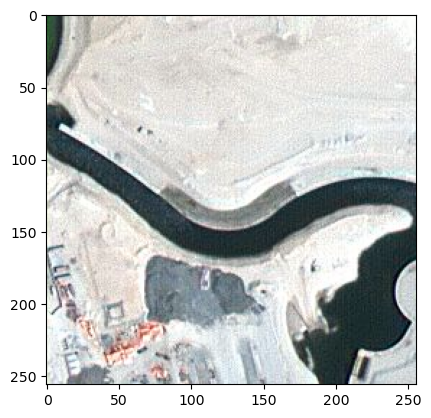

In [59]:
rand = random.randint(0,len(image_dataset))
plt.imshow(mask_dataset[rand])

plt.imshow(image_dataset[rand])

In [60]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [61]:
mask_dataset.shape[0]


945

In [62]:
label = individual_patched_mask


In [63]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  label_segment = label_segment[:,:,0]
  return label_segment
     

In [64]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [65]:
print(len(labels))


945


In [66]:
labels = np.array(labels)


In [67]:
labels[3]


array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [68]:
labels = np.expand_dims(labels, axis=3)


In [69]:
labels[0]


array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [70]:
np.unique(labels)


array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [71]:
print("Total unique labels based on masks: ",format(np.unique(labels)))


Total unique labels based on masks:  [0 1 2 3 4 5]


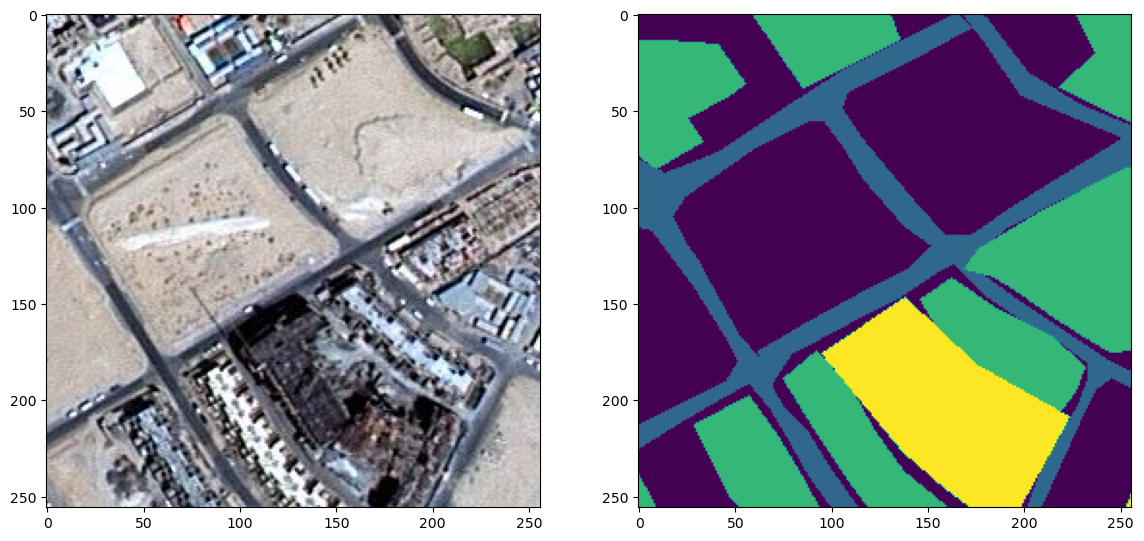

In [72]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(labels[random_image_id][:,:,0])

In [73]:
labels[0][:,:,0]


array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [74]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [75]:
total_classes = len(np.unique(labels))

total_classes


6

In [76]:
from tensorflow.keras.utils import to_categorical 


In [77]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)


In [78]:
labels_categorical_dataset.shape
master_trianing_dataset = image_dataset


In [81]:
master_trianing_dataset.shape


(945, 256, 256, 3)

In [82]:
from sklearn.model_selection import train_test_split


In [83]:
X_train, X_test, y_train, y_test = train_test_split(master_trianing_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)


In [84]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [85]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [86]:
from keras.models import Model

In [87]:
from keras.layers import Input,MaxPooling2D,Conv2D,Conv2DTranspose,UpSampling2D

In [88]:
from keras.layers import concatenate, BatchNormalization, Dropout , Lambda

In [89]:
from keras import backend as K

In [90]:
def jaccard_coef(y_true, y_pred, smooth=1e-6):
  """
  Calculates the Jaccard Coefficient (IoU) metric using TensorFlow operations.
  Correctly handles batch dimension and applies smoothing.

  Args:
    y_true: Ground truth masks (usually one-hot), shape (batch, H, W, C).
    y_pred: Predicted masks (probabilities or logits), shape (batch, H, W, C).
    smooth: Smoothing factor to prevent division by zero.

  Returns:
    Scalar tensor representing the mean Jaccard coefficient across the batch.
  """
  # Ensure inputs are float type
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate intersection and sums over spatial and class axes (H, W, C)
  # This keeps results separate for each image in the batch.
  axes_to_reduce = (1, 2, 3)
  intersection = tf.reduce_sum(y_true * y_pred, axis=axes_to_reduce) # Shape: (batch,)
  sum_true = tf.reduce_sum(y_true, axis=axes_to_reduce)             # Shape: (batch,)
  sum_pred = tf.reduce_sum(y_pred, axis=axes_to_reduce)             # Shape: (batch,)

  # Calculate union
  union = sum_true + sum_pred - intersection                          # Shape: (batch,)

  # Calculate Jaccard coefficient for each image in the batch
  # Apply smoothing correctly to numerator and denominator
  jaccard_per_item = (intersection + smooth) / (union + smooth)       # Shape: (batch,)

  # Calculate the mean Jaccard coefficient across the batch
  final_coef_value = tf.reduce_mean(jaccard_per_item)                 # Scalar

  return final_coef_value
     

In [91]:
def multi_unet_model(n_classes = 5, image_height = 256 , image_width = 256 , image_channels = 1):
    inputs = Input((image_height,image_width,image_channels ))
    source_input = inputs
    c1 =  Conv2D(16, (3,3), activation="relu" , kernel_initializer="he_normal",padding="same")(source_input)
    c1 =    Dropout(0.2)(c1)
    c1 =  Conv2D(16, (3,3), activation="relu" , kernel_initializer="he_normal",padding="same")(c1)
    p1 =   MaxPooling2D((2,2))(c1)
    
    c2 =  Conv2D(32, (3,3), activation="relu" , kernel_initializer="he_normal",padding="same")(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3,3) , activation="relu", kernel_initializer="he_normal",padding="same")(c2)
    p2 = MaxPooling2D((2,2))(c2)
    
    c3 =  Conv2D(64, (3,3), activation="relu" , kernel_initializer="he_normal",padding="same")(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64 ,(3,3) , activation="relu", kernel_initializer="he_normal",padding="same")(c3)
    p3 = MaxPooling2D((2,2))(c3)

    c4 =  Conv2D(128, (3,3), activation="relu" , kernel_initializer="he_normal",padding="same")(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3,3) , activation="relu", kernel_initializer="he_normal",padding="same")(c4)
    p4 = MaxPooling2D((2,2))(c4)

    c5 =  Conv2D(256, (3,3), activation="relu" , kernel_initializer="he_normal",padding="same")(p4)
    c5 = Dropout(0.2)(c5)
    c5 =  Conv2D(256, (3,3), activation="relu" , kernel_initializer="he_normal",padding="same")(c5)

    u6 = Conv2DTranspose(128,(2,2),strides= (2,2),padding="same")(c5)
    u6 = concatenate([u6,c4])
    c6 = Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c6)

    u7 = Conv2DTranspose(64,(2,2),strides= (2,2),padding="same")(c6)
    u7 = concatenate([u7,c3])
    c7 = Conv2D(64,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c7)

    u8 = Conv2DTranspose(32,(2,2),strides= (2,2),padding="same")(c7)
    u8 = concatenate([u8,c2])
    c8 = Conv2D(32,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c8)

    u9 = Conv2DTranspose(16,(2,2),strides= (2,2),padding="same")(c8)
    u9 = concatenate([u9,c1],axis=3)
    c9 = Conv2D(16,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c9)

    outputs = Conv2D(n_classes,(1,1), activation="softmax")(c9)
    model = Model(inputs=[inputs],outputs=[outputs])
    return model
    

In [92]:
metrics = ["accuracy",jaccard_coef]

In [93]:
def get_deep_learning_model():
    return multi_unet_model(n_classes = total_classes, image_height = image_height , image_width = image_width , image_channels = image_channels)

In [94]:
model = get_deep_learning_model()

In [95]:
model.get_config()

{'name': 'functional',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_layer'},
   'registered_name': None,
   'name': 'input_layer',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.ini

In [96]:
weights = [0.166,0.166,0.166,0.166,0.166,0.166]

In [113]:
def dice_loss_weighted(y_true, y_pred, class_weights, smooth=1e-6):
    """
    Computes the weighted Dice Loss using TensorFlow operations.

    Args:
        y_true: Ground truth labels (one-hot encoded), shape (batch, H, W, C).
        y_pred: Predicted probabilities (softmax output), shape (batch, H, W, C).
        class_weights: Tensor of weights for each class, shape (C,).
        smooth: Smoothing factor to prevent division by zero.

    Returns:
        Weighted Dice loss (scalar tensor).
    """
    # Ensure inputs are float32
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    # Calculate intersection and union per class, summing over spatial dims (H, W)
    axes_to_reduce = (1, 2) # Sum over Height and Width
    # --- Use tf.reduce_sum instead of K.sum ---
    intersection = tf.reduce_sum(y_true * y_pred, axis=axes_to_reduce) # Shape: (batch, C)
    sum_true = tf.reduce_sum(y_true, axis=axes_to_reduce)             # Shape: (batch, C)
    sum_pred = tf.reduce_sum(y_pred, axis=axes_to_reduce)             # Shape: (batch, C)

    # Calculate per-class Dice coefficient
    dice_per_class = (2. * intersection + smooth) / (sum_true + sum_pred + smooth) # Shape: (batch, C)

    # Calculate the weighted average of Dice coefficients across classes
    # --- Use tf.reduce_sum ---
    weighted_dice_coef = tf.reduce_sum(dice_per_class * class_weights, axis=-1) / tf.reduce_sum(class_weights) # Shape: (batch,)

    # Average the weighted Dice coefficient over the batch
    # --- Use tf.reduce_mean instead of K.mean ---
    mean_weighted_dice_coef = tf.reduce_mean(weighted_dice_coef) # Scalar

    # Dice Loss is 1 - Dice Coefficient
    return 1.0 - mean_weighted_dice_coef

def categorical_focal_loss(y_true, y_pred, alpha=0.25, gamma=2.0, epsilon=1e-7):
    """
    Computes the Categorical Focal Loss using TensorFlow operations. Assumes y_pred contains probabilities.

    Args:
        y_true: Ground truth labels (one-hot encoded), shape (batch, H, W, C).
        y_pred: Predicted probabilities (softmax output), shape (batch, H, W, C).
        alpha: Balancing factor (scalar or list/tensor of size C).
        gamma: Focusing parameter (scalar).
        epsilon: Small value to avoid log(0).

    Returns:
        Categorical Focal loss (scalar tensor).
    """
    # Ensure inputs are float32
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    # Clip predictions to prevent numerical instability (log(0))
    # --- Use tf.clip_by_value instead of K.clip ---
    y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)

    # Calculate the cross-entropy term component-wise
    # --- Use tf.math.log instead of K.log ---
    cross_entropy = y_true * tf.math.log(y_pred) # Shape: (batch, H, W, C)

    # Calculate the prediction probability for the true class (pt)
    # --- Use tf.reduce_sum ---
    pt = tf.reduce_sum(y_true * y_pred, axis=-1, keepdims=True) # Shape: (batch, H, W, 1)

    # Calculate the modulating factor: (1 - pt)^gamma
    # --- Use tf.math.pow instead of K.pow ---
    modulating_factor = tf.math.pow(1.0 - pt, gamma) # Shape: (batch, H, W, 1)

    # Calculate the final focal loss component-wise
    focal_cross_entropy = - alpha * modulating_factor * cross_entropy # Shape: (batch, H, W, C)

    # Sum the focal loss over the class dimension
    # --- Use tf.reduce_sum ---
    focal_loss_per_pixel = tf.reduce_sum(focal_cross_entropy, axis=-1) # Shape: (batch, H, W)

    # Average the loss over all pixels and batch items
    # --- Use tf.reduce_mean instead of K.mean ---
    return tf.reduce_mean(focal_loss_per_pixel) # Scalar

# --- Corrected Combined Loss Function ---

def total_loss(y_true, y_pred): # Rename this if you had a previous version
    """
    Combines the manually implemented weighted Dice Loss and Categorical Focal Loss (TF versions).
    Uses the globally defined class_weights_tensor.
    """
    # Calculate Dice loss using our weighted function (now TF-based)
    d_loss = dice_loss_weighted(y_true, y_pred, class_weights=weights)

    # Calculate Focal loss using our manual function (now TF-based)
    f_loss = categorical_focal_loss(y_true, y_pred, alpha=0.25, gamma=2.0)

    # Combine the losses
    total_loss = d_loss + f_loss

    return total_loss

In [115]:
import tensorflow as tf


In [118]:
tf.keras.backend.clear_session()


In [120]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)


In [122]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256, 256,  │          0 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      2,320 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128, 128,  │          0 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │    147,584 │ dropout_3[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]  

 Total params: 1,941,190 (7.41 MB)

 Trainable params: 1,941,190 (7.41 MB)

 Non-trainable params: 0 (0.00 B)

In [124]:
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=100,
                          validation_data=(X_test, y_test),
                          shuffle=False)

Epoch 1/100


C:\Users\Aman Kumar\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)


51/51 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.3330 - jaccard_coef: 0.1712 - loss: 1.1403 - val_accuracy: 0.5631 - val_jaccard_coef: 0.2625 - val_loss: 1.0319
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.6196 - jaccard_coef: 0.3155 - loss: 1.0226 - val_accuracy: 0.6324 - val_jaccard_coef: 0.2786 - val_loss: 1.0162
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.7008 - jaccard_coef: 0.3927 - loss: 0.9499 - val_accuracy: 0.6258 - val_jaccard_coef: 0.3278 - val_loss: 0.9956
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.7078 - jaccard_coef: 0.4278 - loss: 0.9339 - val_accuracy: 0.5589 - val_jaccard_coef: 0.3314 - val_loss: 1.0915
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.7202 - jaccard_coef: 0.4579 - loss: 0.9225 - val_accuracy: 0.6517 - val_jaccard_coef: 0.4385 - val_loss: 0.9642
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.7431 - jaccard_coef: 0.4891 - loss: 0.8949 - val_accuracy: 0.6

In [126]:
history_a = model_history


In [128]:
history_a.history


{'accuracy': [0.474183052778244,
  0.6536630392074585,
  0.6967848539352417,
  0.7056323885917664,
  0.7265641689300537,
  0.7474027276039124,
  0.7437573075294495,
  0.7680080533027649,
  0.7774821519851685,
  0.7869740128517151,
  0.797235906124115,
  0.8048784136772156,
  0.8103200793266296,
  0.8177926540374756,
  0.8225299119949341,
  0.8248974084854126,
  0.8279574513435364,
  0.8299497365951538,
  0.8342896103858948,
  0.8369684219360352,
  0.8386859893798828,
  0.8451411128044128,
  0.8439224362373352,
  0.8456140160560608,
  0.8473093509674072,
  0.8518216609954834,
  0.8493379950523376,
  0.8512409925460815,
  0.8531655073165894,
  0.8584553003311157,
  0.8608450889587402,
  0.8631141185760498,
  0.8638501763343811,
  0.8622299432754517,
  0.8543977737426758,
  0.8663318157196045,
  0.8705616593360901,
  0.8719902634620667,
  0.8718615770339966,
  0.8720503449440002,
  0.879002571105957,
  0.8759708404541016,
  0.8806952238082886,
  0.8827959299087524,
  0.8807747960090637,
 

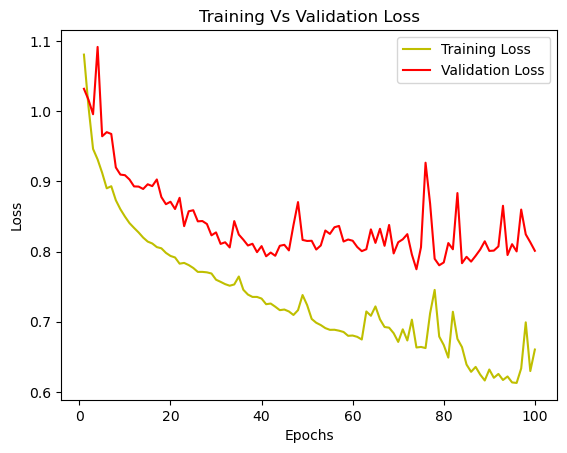

In [130]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

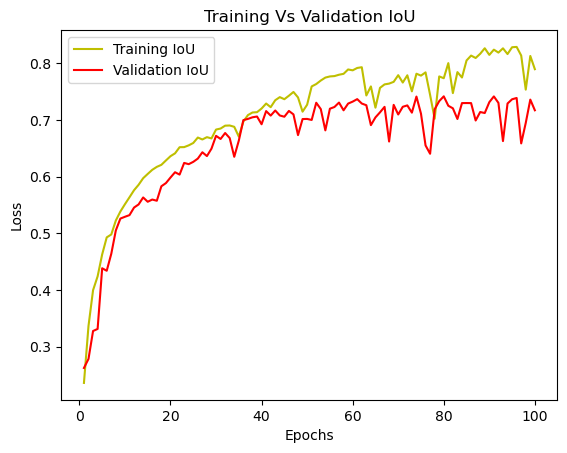

In [132]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [134]:
model_history.params


{'verbose': 1, 'epochs': 100, 'steps': 51}

In [136]:
y_pred = model.predict(X_test)


C:\Users\Aman Kumar\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 256, 256, 3))
  warnings.warn(msg)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 343ms/step


In [138]:
len(y_pred)


142

In [140]:
y_pred


array([[[[2.14714557e-02, 6.37390435e-01, 1.34536996e-01,
          7.23555088e-02, 6.25049621e-02, 7.17406869e-02],
         [6.68500038e-03, 7.32131660e-01, 1.03092104e-01,
          5.20828739e-02, 5.50001040e-02, 5.10082990e-02],
         [6.29097037e-03, 7.38580346e-01, 9.39790979e-02,
          5.20679802e-02, 6.80513233e-02, 4.10302617e-02],
         ...,
         [5.50244888e-03, 3.65806669e-01, 3.78123298e-02,
          4.86338347e-01, 6.69808611e-02, 3.75593491e-02],
         [3.45952273e-03, 3.84522974e-01, 3.10583021e-02,
          4.69597191e-01, 8.51691291e-02, 2.61928421e-02],
         [1.44337369e-02, 3.47694814e-01, 6.46527484e-02,
          3.75527292e-01, 1.50603011e-01, 4.70883995e-02]],

        [[2.04479415e-03, 8.25676560e-01, 7.56654441e-02,
          4.55948822e-02, 1.36159090e-02, 3.74024957e-02],
         [3.52751405e-04, 8.81491482e-01, 4.94390279e-02,
          3.53516228e-02, 8.54355656e-03, 2.48215720e-02],
         [5.48723736e-04, 8.81266534e-01, 5.5479

In [142]:
y_test_argmax = np.argmax(y_test, axis=3)


In [144]:
y_test_argmax


array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [146]:
import random


In [148]:
y_test_argmax


array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [214]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


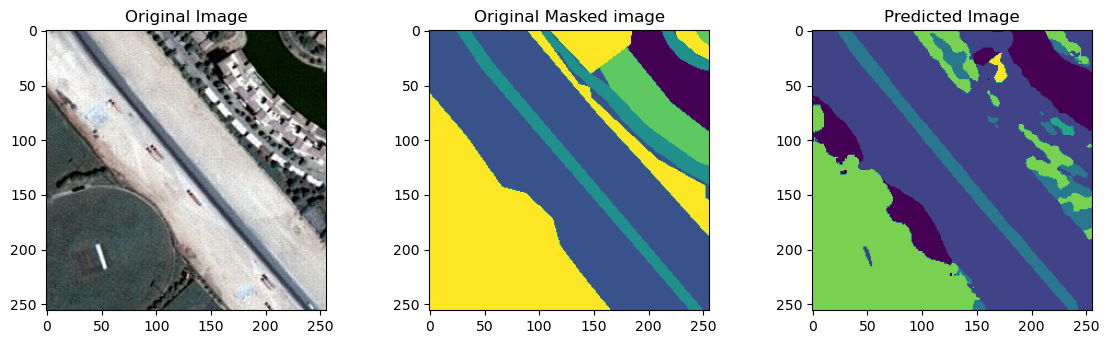

In [216]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [192]:
model.save("satellite_segmentation_full.h5")
